In [9]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
import time
import subprocess
import sys

sys.path.append("..")
from main import Formula, WalkSat



In [10]:
# OPCIONS EXPERIMENT
MAX_CLAUSES = 100
STEP = 10

OCURRENCES = 10


# TODO fer que es pugi passar per parametre aquestes opcions
max_tries = 1000
max_flips = 1000
w = 0.8


In [11]:
%rm - rf ./experiment
%mkdir experiment

# Generate the experiments
for n in range(10, MAX_CLAUSES, STEP):
    clear_output()
    print(n)
    os.system("mkdir ./experiment/%i" % n)
    for i in range(1, OCURRENCES):
        #                       <num-vars> <num-clauses> <clause-length>
        os.popen(
            "python3 ./rnd-cnf-gen.py 50 %i 3 %i > ./experiment/%i/%i.cnf" % (n, i, n, i))


90


mkdir: ./experiment/90: File exists


In [12]:
res = os.listdir("experiment")
casted = [int(elem) for elem in res]
casted.sort()
experiments = casted
x_axis = experiments
x_axis


[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [13]:
y_axis = []

for exp in experiments:
    problems = os.listdir("./experiment/%s" % exp)
    clear_output()
    print(exp)

    sum = 0
    count = 0
    for problem in problems:
        start = time.time()

        formula = Formula("./experiment/%s/%s" % (exp, problem))
        solver = WalkSat(formula)
        res = solver.solve()

        end = time.time()

        if res:
            sum += end-start
            count += 1
    if count == 0:
        y_axis.append(max(y_axis))
    else:   
        y_axis.append(sum/count)

clear_output()
y_axis


[0.0017493036058213976,
 0.008483833736843534,
 0.044211758507622614,
 0.17536740832858616,
 0.41846446990966796,
 0.3982551097869873,
 0.8443610668182373,
 9999,
 9999]

Text(0, 0.5, 'Seconds')

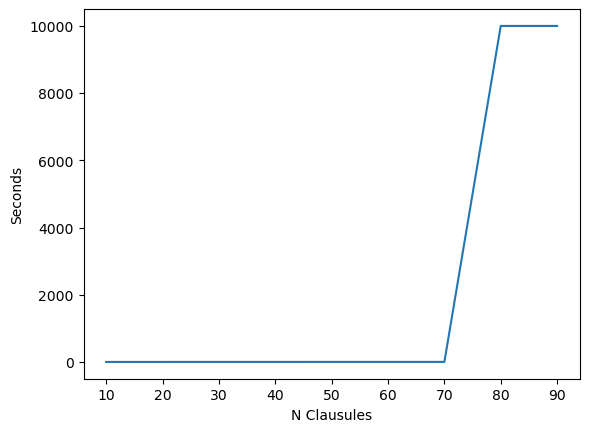

In [14]:
plt.plot(x_axis, y_axis)
plt.xlabel("N Clausules")
plt.ylabel("Seconds")
